In [2]:
# Importing necessary libraries and stuff
# (Note: some commented out lines show I import a lot that isn't required here in this code, just a force of bad habit)
import os, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import img_to_array, load_img
from keras import layers, models, optimizers
# from keras import backend as K
# from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

C:\Users\Abhishek Mohanty\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


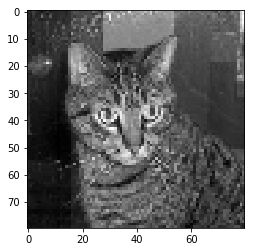

In [3]:
# Taking the image data and converting it so that the model can process it.
main_dir = "F:/AI Mini Projects/DL Projects/2) Doggo vs Catto/"
train_dir = "F:/AI Mini Projects/DL Projects/2) Doggo vs Catto/training_set"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break
    # break above means only 1 image is displayed, remove to show all

In [4]:
"""
Declaring training array X and target array y. 
Here X will be the array of pixels and y will be value 0 or 1 indicating its a dog or cat.
Writing a convert function to map category "dog" or "cat" into 1 and 0.
Thereafter, 
Creating a function create_test_data which takes all training images into a loop, 
Converts into image array.
Resize image into 80 X80. 
Append image into X array. 
Append category value into y array.
"""

X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)

In [5]:
# Resizing X 
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

In [6]:
#Normalize data
X = X/255.0

In [7]:
# FINALLY!!!!! TIME TO TRAIN THE MODEL YAY!
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
# Fitting the created model with the training data
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Train on 6404 samples, validate on 1601 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
6404/6404 [==============================] - 99s 15ms/sample - loss: 0.6405 - acc: 0.6385 - val_loss: 0.8589 - val_acc: 0.3966
Epoch 2/10
6404/6404 [==============================] - 98s 15ms/sample - loss: 0.5742 - acc: 0.7024 - val_loss: 0.7246 - val_acc: 0.5528
Epoch 3/10
6404/6404 [==============================] - 98s 15ms/sample - loss: 0.5173 - acc: 0.7456 - val_loss: 0.7372 - val_acc: 0.5921
Epoch 4/10
6404/6404 [==============================] - 99s 15ms/sample - loss: 0.4564 - acc: 0.7783 - val_loss: 0.6552 - val_acc: 0.6708
Epoch 5/10
6404/6404 [==============================] - 98s 15ms/sample - loss: 0.4087 - acc: 0.8151 - val_loss: 1.3312 - val_acc: 0.3723
Epoch 6/10
6404/6404 [==============================] - 98s 15ms/sample - loss: 0.3524 - acc: 0.8404 - val_loss: 0.9928 - val_acc: 0.5778
Epoch 7/10
6404/6404 [==============================] - 99s 15ms/sample - lo

In [9]:
# Processing the test data similar to the training data 
train_dir1 = "F:/AI Mini Projects/DL Projects/2) Doggo vs Catto/test_set"
path = os.path.join(main_dir,train_dir1)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255

In [10]:
# PREDICTION TIME!
predictions = model.predict(X_test)

In [11]:
# Rounding off the acquired results since we used a sigmoid function that gave us probabilites.
# This line can be removed if you want to know exactly what prob the model predicts our test data for
predicted_val = [int(round(p[0])) for p in predictions]